# Non-Traffic Citations

`Non-traffic citations (NTCs)`, also known as summary offenses, are the most minor criminal offenses conducted in Pennsylvania. Examples range from disorderly conduct, loitering, and littering to animal abuse or illegal possession of fireworks.

In fact, according to the dataset, the five most common NTCs are:
> - Public Drunkenness (2687)
> - Harassment by Physical Contact, or Attempts or Threats (1311)
> - Any Person who urinates or defecates in, on, or about any public place (1100)
> - DISORDERLY CONDUCT - ENGAGE IN FIGHTING (1070)
> - Possessing a small amount of marijuana (1030)

For our metric of `"responsibility"`, neighborhoods with the **greatest amount** of NTCs are deemed the most irresponsible, while neighborhoods with the **least amount** of NTCs are deemed the most responsible

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Non-Traffic_Citations.csv") #non-traffic citations dataset
populations = pd.read_csv("Neighborhoods_with_SNAP_Data.csv") #dataset used for populations

In [3]:
#getting rid of all columns except for offenses and neighborhoods
data = data.drop(columns=['PK', 'CCR', 'GENDER', 'RACE', 'AGE', 'CITEDTIME', 'INCIDENTLOCATION', 'ZONE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION', 'X', 'Y'])
#Removing unimportant neighborhoods or neighborhoods not present in other datasets
data.dropna(subset="NEIGHBORHOOD",inplace=True) #getting rid of no neighborhood rows
data.drop(data[data["NEIGHBORHOOD"].isin(["Allegheny Center","Golden Triangle/Civic Arena","Outside City","Outside County","Outside State","Unable To Retrieve Address","Mt. Oliver Neighborhood","Mt. Oliver Boro"])].index, inplace=True)
data["NEIGHBORHOOD"].replace(to_replace="Mount Oliver",value="Mt. Oliver",inplace=True) #updating names for compatibility
data["NEIGHBORHOOD"].replace(to_replace="Central North Side",value="Central Northside",inplace=True)

In [4]:
display(data)

,OFFENSES,NEIGHBORHOOD
0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland
1,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland
3,"6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South
4,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville
8,5505 Public Drunkenness,Lower Lawrenceville
...,...,...
13862,5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGH...,Lower Lawrenceville
13863,5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGH...,Middle Hill
13865,5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGH...,Middle Hill
13866,"2709(a)(1) Harassment by Physical Contact, or ...",Northview Heights


#### The Results

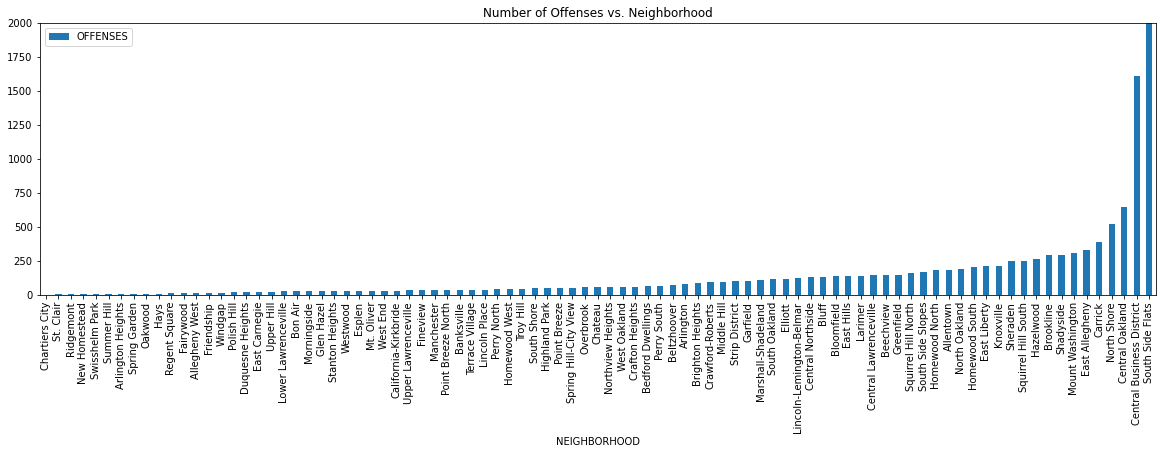

In [5]:
data = data.groupby("NEIGHBORHOOD").count()
data.sort_values(by="OFFENSES",inplace=True) #Sorting the data by number of offenses
data.plot.bar(figsize=(20,5),title="Number of Offenses vs. Neighborhood",ylim=(0,2000))

Based on the graph of the amount of offenses per neighborhood, the least responsible neighborhoods are: Carrick, North Shore, Central Oakland, Central Business District, and South Side Flats

In [6]:
data.tail(5)

,OFFENSES
NEIGHBORHOOD,
Carrick,391
North Shore,519
Central Oakland,642
Central Business District,1607
South Side Flats,3191


While the most responsible neighborhoods are: Swsshelm Park, New Homestead, Ridgemont, St. Clair, and Chartiers City

In [7]:
data.head(5)

,OFFENSES
NEIGHBORHOOD,
Chartiers City,1
St. Clair,3
Ridgemont,3
New Homestead,5
Swisshelm Park,6


However, the amount of summary offenses could be distorted based on the differences in size of the neighborhood populations. So, the best way to determine responsibility is to find the ratio of offenses to people in a neighborhood.

Unfortunately, the only dataset I could find with population data was last updated in 2010. Hopefully, it should still give an accurate representation of the differences in population between the neighborhoods.

In [8]:
#Only need the 2010 population data for the neighborhoods from this dataset
populations = populations[["Neighborhood_2010_HOOD","Pop__2010"]]
#Removing neighborhoods so that the two datasets line up
populations.drop(populations[populations["Neighborhood_2010_HOOD"].isin(["Allegheny Center","Golden Triangle/Civic Arena","Outside City","Outside County","Outside State","Unable To Retrieve Address","Mt. Oliver Neighborhood","Mt. Oliver Boro"])].index, inplace=True)
#renaming the column for compatibility
populations.rename(columns = {'Neighborhood_2010_HOOD':'NEIGHBORHOOD'}, inplace = True)
#merging the NTC and population datasets
combined = pd.merge(data,populations,on="NEIGHBORHOOD",how="left")


In [9]:
#Creating the ratio column
combined.insert(len(combined.columns),"RATIO","") #making a new empty column
#calculating the ratios
for i,rows in combined.iterrows():
    combined["RATIO"].iloc[i] = combined["OFFENSES"].iloc[i] / combined["Pop__2010"].iloc[i]
#sorting by ratio
combined.sort_values(by="RATIO",inplace=True)
#Removing neighborhoods with a population less than or equal to 100
combined.query("Pop__2010 > 100",inplace=True)

<ipython-input-9-41658149777e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["RATIO"].iloc[i] = combined["OFFENSES"].iloc[i] / combined["Pop__2010"].iloc[i]


In [10]:
display(combined)

,NEIGHBORHOOD,OFFENSES,Pop__2010,RATIO
0,Chartiers City,1,477,0.002096
4,Swisshelm Park,6,1361,0.004409
3,New Homestead,5,990,0.005051
23,Stanton Heights,27,4601,0.005868
2,Ridgemont,3,483,0.006211
...,...,...,...,...
83,East Allegheny,330,2136,0.154494
55,Strip District,97,616,0.157468
87,Central Business District,1607,3629,0.442822
88,South Side Flats,3191,6597,0.483705


#### Ratio Results

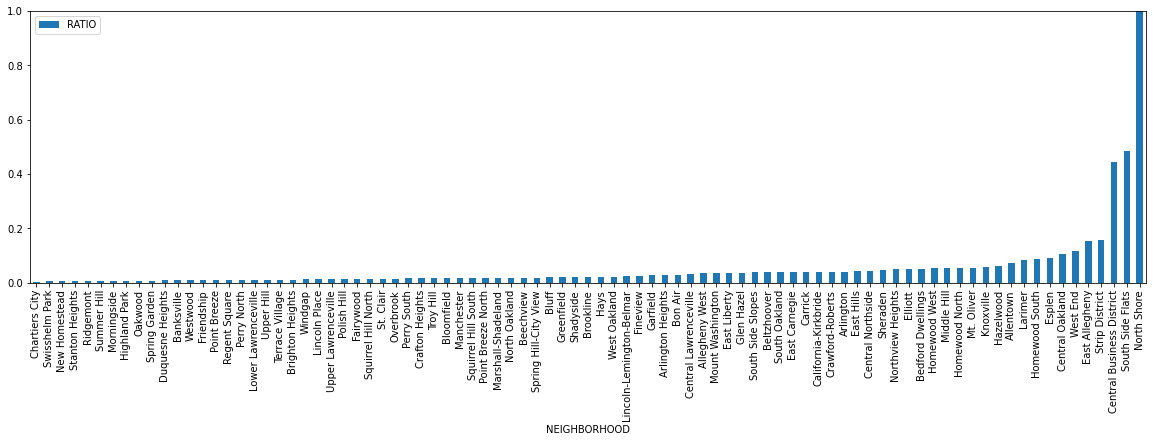

In [11]:
combined.plot.bar(x="NEIGHBORHOOD",y="RATIO",figsize=(20,5),ylim=(0,1.0))

Now with population factored in, based on non-traffic citations, these are the **MOST** responsible neighborhoods (smallest ratio):
> 1. **Chartiers City**
> 2. Swisshelm Park
> 3. New Homestead
> 4. Stanton Heights
> 5. Ridgemont

In [12]:
combined.head(5)

,NEIGHBORHOOD,OFFENSES,Pop__2010,RATIO
0,Chartiers City,1,477,0.002096
4,Swisshelm Park,6,1361,0.004409
3,New Homestead,5,990,0.005051
23,Stanton Heights,27,4601,0.005868
2,Ridgemont,3,483,0.006211


And the **LEAST** responsible neighborhoods are (largest ratio):
> 1. **East Allegheny**
> 2. Strip District
> 3. Central Business District
> 4. South Side Flats
> 5. North Shore

In [13]:
combined.tail(5)

,NEIGHBORHOOD,OFFENSES,Pop__2010,RATIO
83,East Allegheny,330,2136,0.154494
55,Strip District,97,616,0.157468
87,Central Business District,1607,3629,0.442822
88,South Side Flats,3191,6597,0.483705
85,North Shore,519,303,1.712871
